In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , RepeatedStratifiedKFold , RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score , roc_curve , f1_score , fbeta_score , confusion_matrix , classification_report , make_scorer , balanced_accuracy_score

from xgboost import XGBClassifier
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [2]:
data = pd.read_csv("nasa.csv")
df = data.copy()
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.isnull().sum().sum()

0

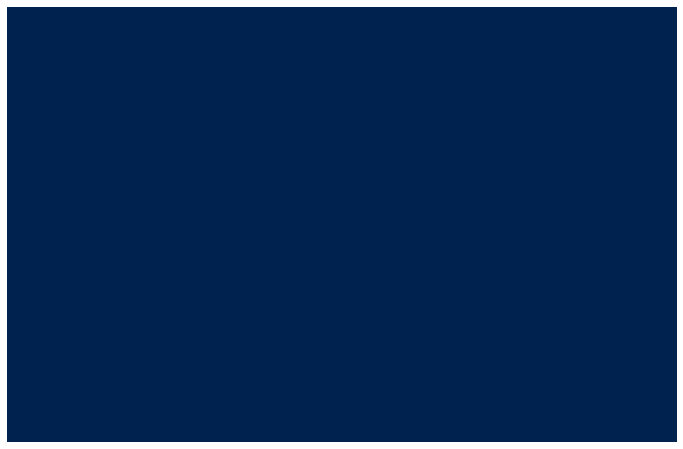

In [4]:
sns.heatmap(data = df.isnull() , cmap = "cividis" , yticklabels=False , xticklabels = False , cbar = False)
plt.show()

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [7]:
df.drop(columns = ["Neo Reference ID" , "Orbiting Body" , "Equinox"] , inplace = True)
df.head()

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [8]:
df["Hazardous"] = df["Hazardous"].apply(lambda x : int(x))

In [9]:
date = df["Close Approach Date"].str.split("-" , expand = True)
date.columns = ["Year" , "Month" , "Days"]
date.head()

,Year,Month,Days
0,1995,01,01
1,1995,01,01
2,1995,01,08
3,1995,01,15
4,1995,01,15


In [10]:
df.drop(columns = ["Close Approach Date" , "Orbit Determination Date"] , inplace = True)
df = pd.concat([df, date] , axis  = 1)
df.head()

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Year,Month,Days
0,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1,1995,01,01
1,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,1995,01,01
2,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1,1995,01,08
3,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,1995,01,15
4,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1,1995,01,15


In [11]:
obj = ["Year" , "Month" , "Days"]
for x in df.columns : 
    if x in obj : 
        df[x] = df[x].astype("int")

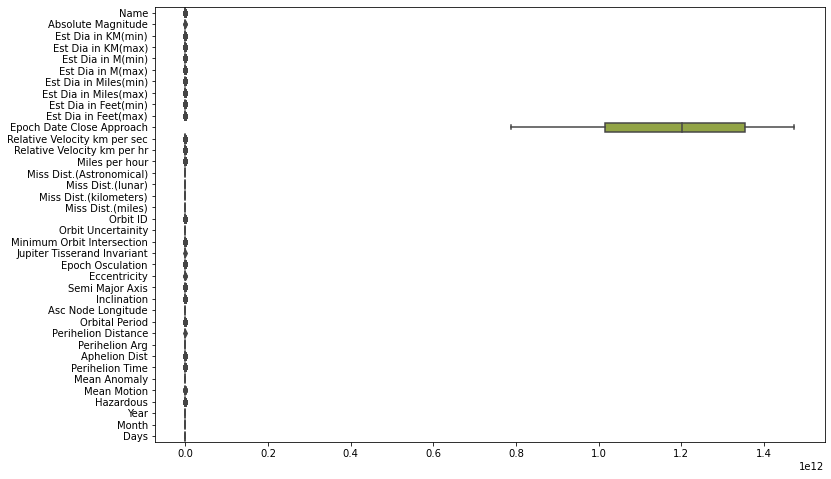

In [12]:
sns.boxplot(data = df , orient="h")
plt.show()

In [13]:
X = df.drop(columns = ["Hazardous"])
y = df["Hazardous"]

In [14]:
y.value_counts(normalize = True)

0    0.838916
1    0.161084
Name: Hazardous, dtype: float64

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42 , stratify=y)

In [16]:
beta = make_scorer(fbeta_score , beta = 0.5)
feature_select = RFECV(estimator=XGBClassifier() , cv = RepeatedStratifiedKFold(random_state=42) , scoring=beta , n_jobs=-1 , verbose=1)
feature_select.fit(X_train , y_train)

Fitting estimator with 37 features.
[10:16:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 36 features.
[10:16:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 35 features.
[10:16:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 34

RFECV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
      estimator=XGBClassifier(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, enable_categorical=False,
                              gamma=None, gpu_id=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, ver

In [17]:
deleted_features = feature_select.n_features_

if deleted_features != X.shape[1] : 
    print("{} features are deleted".format(X_train.shape[1] - deleted_features))
else : 
    print("No features are deleted")

33 features are deleted


In [18]:
X_train = feature_select.transform(X_train)
X_test = feature_select.transform(X_test)

In [19]:
sc_x = RobustScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [20]:
def hyperparametr_grid(model_name , params) : 
    grid = GridSearchCV(estimator=model_name , param_grid=params , scoring="accuracy" , n_jobs=-1 , cv = 10)
    grid.fit(X_train , y_train)
    
    return grid.best_estimator_

In [24]:
def hyperparametr_random(model_name , params) : 
    rd = RandomizedSearchCV(estimator=model_name , param_distributions=params , scoring="accuracy" , n_jobs=-1 , cv = 10)
    rd.fit(X_train,  y_train)
    
    return rd.best_estimator_

In [51]:
def score_func(model_name) :
    train_score = model_name.score(X_train , y_train)
    test_score = model_name.score(X_test , y_test)
    print("The train score is {:.2%}".format(train_score))
    print("THe test score is {:.2%}".format(test_score))

In [54]:
def metrics(model_name) : 
    y_pred = model_name.predict(X_test)
    roc = roc_auc_score(y_test , y_pred)
    f1 = f1_score(y_test , y_pred)
    gini = (2*roc) - 1
    balance = balanced_accuracy_score(y_test , y_pred)
    fbeta = fbeta_score(y_test , y_pred , beta = 0.5)
    
    print("The roc auc score is {:.2%}".format(roc))
    print("The f1 score is {:.2%}".format(f1))
    print("The gini score is {:.2%}".format(gini))
    print("The balance score is {:.2%}".format(balance))
    print("The fbeta score is {:.2%}".format(fbeta))

In [72]:
def cross_function(model_name) : 
    y_pred = model_name.predict(X_test)
    
    cr = cross_val_score(estimator=model_name , X = X_train , y = y_train , scoring="accuracy" , cv = 10 , n_jobs=-1)
    
    max_score = np.argmax(cr)
    min_score = np.argmin(cr)
    mean = np.mean(cr)
    
    print("The maxsimum score can be {:.2%}".format(cr[max_score]))
    print("The minumum score can be {:.2%}".format(cr[min_score]))
    print("The mean of the cr is {:.2%}".format(mean))

In [58]:
def roc_curve_function(model_name) : 
    fpr, tpr , _ =  roc_curve(y_true = y_test , y_score = model_name.predict_proba(X_test)[:,1])
    plt.plot(fpr , tpr , label = "Our Model" , c = "magenta")
    plt.plot([0,1] , [0,1] , label = "Random Model" , c = "green")
    plt.title("Roc Curve" , fontsize = 16)
    plt.ylabel("True Positive Rate" , fontsize = 16)
    plt.xlabel("False Positive Rate" , fontsize = 16)
    plt.grid()
    plt.legend(loc = "best")
    plt.show()

In [62]:
def confusion_function(model_name) : 
    y_pred = model_name.predict(X_test)
    cm  = confusion_matrix(y_test , y_pred)
    sns.heatmap(data = cm , cmap = "rainbow" , cbar = False , yticklabels=["False" , "True"] , xticklabels=["False" , "True"] , annot = True , fmt = ".4g")
    plt.title("Confussion Matrix" , fontsize =  16)
    plt.xlabel("Predictions" , fontsize = 16)
    plt.show()

In [23]:
parametrs = {"base_score" : [0.5 , 0.6,0.7,0.8,0.9,1] , "gamma" : [0,1,2,3,4,5] , "min_child_weight" : [0.5 , 1,1.5,2] , "n_estimators" : [20,30,40,50,60,70,80,90,100,110,120],
            "max_depth" : [0,1,2,3,4,5,6,7,8,9] ,"subsample" : [0.1 , 0.3 , 0.5 , 0.7 , 0.9 , 1] }

In [40]:
model = hyperparametr_grid(model_name = XGBClassifier() , params=parametrs)
model.fit(X_train , y_train , early_stopping_rounds =40 , eval_set = [(X_train , y_train) , (X_test , y_test)])

[10:32:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:32:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.33817	validation_1-logloss:0.33743
[1]	validation_0-logloss:0.23490	validation_1-logloss:0.23476
[2]	validation_0-logloss:0.16795	validation_1-logloss:0.16778
[3]	validation_0-logloss:0.12205	validation_1-logloss:0.12262
[4]	validation_0-logloss:0.09038	validation_1-logloss:0.09065
[5]	validation_0-logloss:0.06766	validation_1-logloss:0.06795
[6]	validation_0-logloss:0.05130	validation_1-logl

XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
score_func(model_name = model)

The train score is 99.89%
THe test score is 99.79%


In [55]:
metrics(model_name = model)

The roc auc score is 99.61%
The f1 score is 99.34%
The gini score is 99.21%
The balance score is 99.61%
The fbeta score is 99.34%


In [73]:
cross_function(model_name = model)

The maxsimum score can be 100.00%
The minumum score can be 99.20%
The mean of the cr is 99.65%


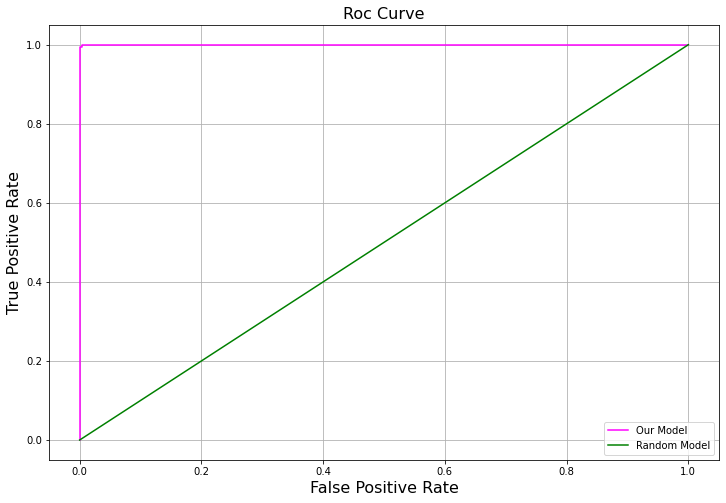

In [59]:
roc_curve_function(model_name = model)

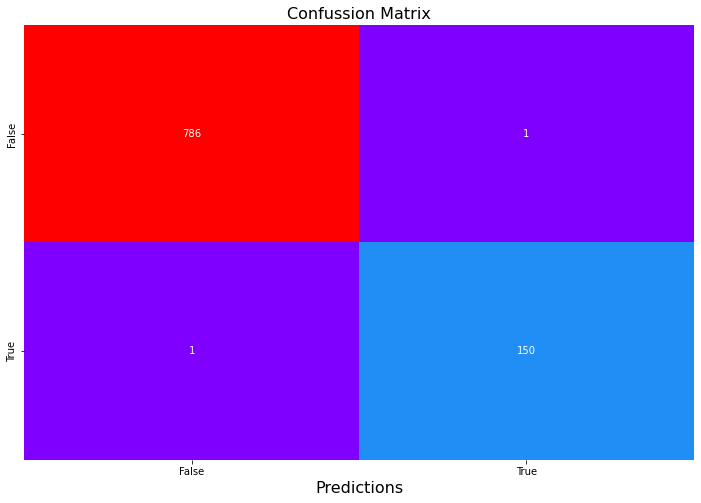

In [63]:
confusion_function(model_name = model)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



In [68]:
model_2 = hyperparametr_random(model_name = XGBClassifier(), params=parametrs)
model_2.fit(X_train , y_train , early_stopping_rounds =40 , eval_set = [(X_train , y_train) , (X_test , y_test)])

[12:15:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.35066	validation_1-logloss:0.35089
[1]	validation_0-logloss:0.24471	validation_1-logloss:0.24489
[2]	validation_0-logloss:0.17625	validation_1-logloss:0.17588
[3]	validation_0-logloss:0.12931	validation_1-logloss:0.12835
[4]	validation_0-logloss:0.09706	validation_1-logloss:0.09585
[5]	validation_0-logloss:0.07461	validation_1-logloss:0.07367
[6]	validation_0-logloss:0.05930	validation_1-logl

XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
score_func(model_name=model_2)

The train score is 99.76%
THe test score is 99.79%


In [70]:
metrics(model_name = model_2)

The roc auc score is 99.61%
The f1 score is 99.34%
The gini score is 99.21%
The balance score is 99.61%
The fbeta score is 99.34%


In [74]:
cross_function(model_name = model_2)

The maxsimum score can be 100.00%
The minumum score can be 98.93%
The mean of the cr is 99.57%


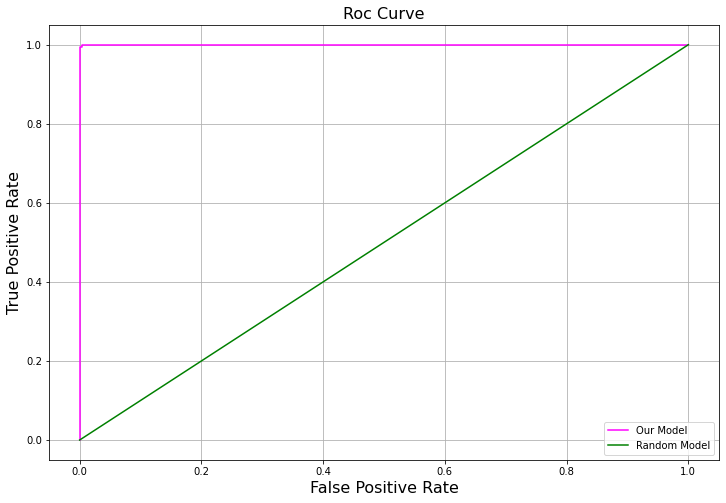

In [76]:
roc_curve_function(model_name = model_2)

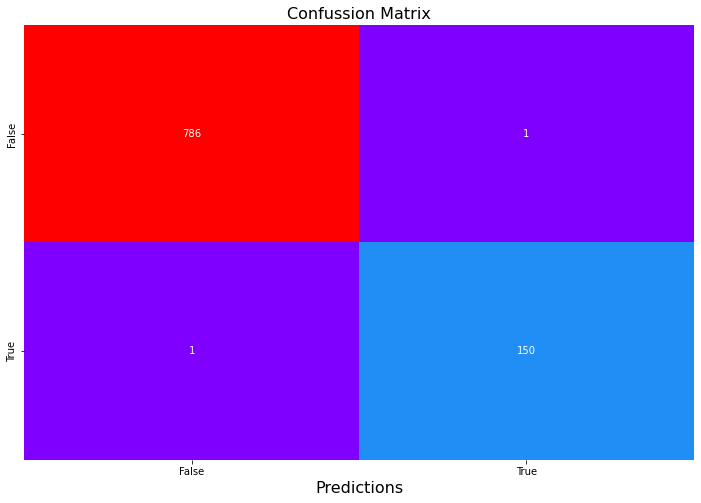

In [77]:
confusion_function(model_name = model_2)

In [86]:
y_pred_test = model_2.predict(X_test)

In [79]:
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938

